In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!unzip /content/drive/MyDrive/data_cour/dataCar.zip

Archive:  /content/drive/MyDrive/data_cour/dataCar.zip
   creating: data/
   creating: data/TRAIN/
   creating: data/TRAIN/Mercedes/
  inflating: data/TRAIN/Mercedes/Mercedes0.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes1.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes10.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes11.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes12.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes13.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes14.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes2.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes3.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes4.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes5.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes6.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes7.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes8.jpg  
  inflating: data/TRAIN/Mercedes/Mercedes9.jpg  
   creating: data/TRAIN/Peugeot/
  inflating: data/TRAIN/Peugeot/Peugeot0.jpg  
  inflating: data/TRAIN/Peugeot/Peugeot1.jpg  


In [ ]:
import os
print('total training COVID-19 images:', len(os.listdir('/content/data/TRAIN/Mercedes')))

total training COVID-19 images: 15


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/TRAIN/Peugeot')))

total training Healthy images: 15


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/TRAIN/Toyota')))

total training Healthy images: 15


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/VAL/Mercedes')))

total training Healthy images: 5


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/VAL/Peugeot')))

total training Healthy images: 5


In [ ]:
print('total training Healthy images:', len(os.listdir('/content/data/VAL/Toyota')))

total training Healthy images: 5


In [ ]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'

## Convolution Neural Network Architecture Design

In [ ]:
from keras import models
from keras.layers import Dropout,MaxPooling2D,Dense,Flatten,Conv2D
model = models.Sequential()
model.add(Conv2D(128, (3, 3), activation='relu',
                        input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='softmax'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 8)         9224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 8)        

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.8,
    horizontal_flip=False,
    vertical_flip=True,
    fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=2,
        class_mode='categorical')
validation_generator = Val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=2,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


## Convolution Neural Network Learning

In [ ]:
from tensorflow.keras.optimizers import Adam
nb_train_samples = 39
nb_validation_samples = 10
epochs = 6
batch_size = 5
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/6


<ipython-input-25-387e71ea08aa>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


7/7 [==============================] - 7s 859ms/step - loss: 0.6913 - accuracy: 0.3571 - val_loss: 0.6905 - val_accuracy: 0.0000e+00
Epoch 2/6
7/7 [==============================] - 6s 821ms/step - loss: 0.6762 - accuracy: 0.3571 - val_loss: 0.6719 - val_accuracy: 0.2500
Epoch 3/6
7/7 [==============================] - 6s 936ms/step - loss: 0.6729 - accuracy: 0.1429 - val_loss: 0.6682 - val_accuracy: 0.5000
Epoch 4/6
7/7 [==============================] - 6s 815ms/step - loss: 0.6712 - accuracy: 0.3571 - val_loss: 0.6703 - val_accuracy: 0.5000
Epoch 5/6
7/7 [==============================] - 6s 804ms/step - loss: 0.6722 - accuracy: 0.2857 - val_loss: 0.6728 - val_accuracy: 0.0000e+00
Epoch 6/6
7/7 [==============================] - 7s 1s/step - loss: 0.6697 - accuracy: 0.4286 - val_loss: 0.6711 - val_accuracy: 0.5000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


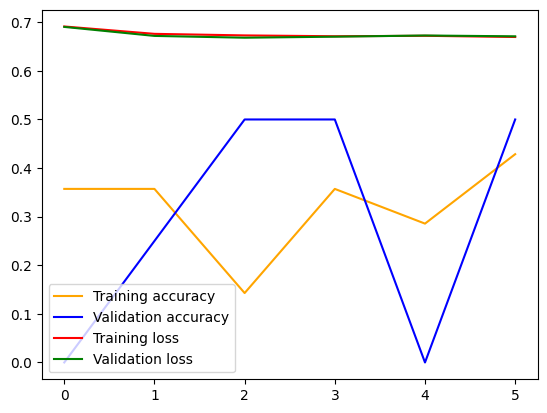

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

## Testing CNN Model

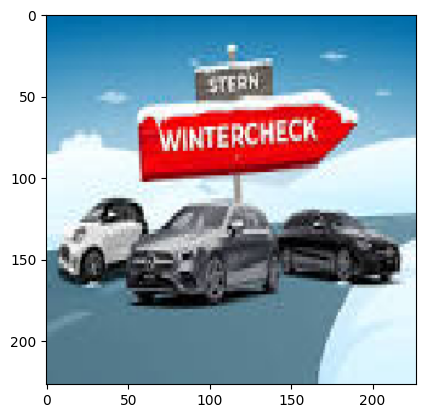

1/1 [==============================] - 0s 109ms/step
[[0.32596138 0.33830145 0.33573714]]
1
Peugeot


In [ ]:
import numpy as np
from keras.preprocessing import image
img_path='/content/data/VAL/Mercedes/Mercedes15.jpg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)
print(np.argmax(score))
if np.argmax(score) == 0 :
  print("Mercedes")
elif np.argmax(score) == 1 :
  print("Peugeot")
else :
  print("Toyota")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Mercedes', 'Peugeot' , 'Toyota']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-31-a84cd77cc5be>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[0 5 0]
 [0 5 0]
 [0 5 0]]
Classification Report
              precision    recall  f1-score   support

    Mercedes       0.00      0.00      0.00         5
     Peugeot       0.33      1.00      0.50         5
      Toyota       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
